In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
## lets create our synthetic dataset
from sklearn.datasets import make_classification

In [18]:
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_classes=2,n_clusters_per_class=2)

In [5]:
X

array([[ 0.51337958, -1.64740395],
       [-0.40330087,  2.31430615],
       [ 1.31075376, -0.82287695],
       ...,
       [-1.49013074,  1.32341873],
       [-0.75694695,  0.48670811],
       [ 1.97366403, -1.1874141 ]])

In [6]:
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [8]:
pd.DataFrame(X)

,0,1
0,0.513380,-1.647404
1,-0.403301,2.314306
2,1.310754,-0.822877
3,-0.230978,-0.702147
4,0.074084,0.971095
...,...,...
995,-1.188160,1.056734
996,-1.543562,0.774058
997,-1.490131,1.323419
998,-0.756947,0.486708


<Axes: xlabel='0', ylabel='1'>

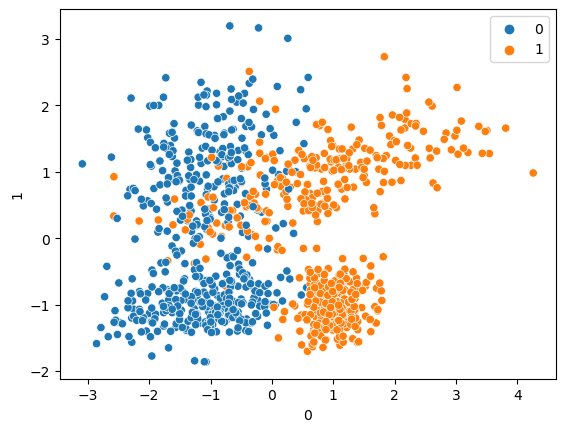

In [19]:
sns.scatterplot(x=0, y=1, hue=y, data=pd.DataFrame(X))



In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [21]:
from sklearn.svm import SVC
s=SVC(kernel='linear')


In [22]:
s.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
y_pred=s.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       150
           1       0.96      0.87      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[145   5]
 [ 19 131]]


In [25]:
rbf=SVC(kernel='rbf')

In [27]:
rbf.fit(X_train,y_train)

SVC()

In [29]:
y_pred1=rbf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       150
           1       0.95      0.92      0.93       150

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

[[142   8]
 [ 12 138]]


## HyperParameter Tunning with SVC 

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid correctly
param_grid = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # Corrected 'grammar' to 'gamma'
    'kernel': ['rbf']  # Corrected 'kernal' to 'kernel'
}

# Pass an instance of SVC, not the class
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.943 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [38]:
y_pred2=grid.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       150
           1       0.91      0.93      0.92       150

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[137  13]
 [ 11 139]]
